<a href="https://colab.research.google.com/github/th2ry95/Data-Science-Portfolio/blob/main/01_Analyse_Ventes_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1- Générer les données fictives

In [2]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Configuration de la simulation
n_rows = 10000
products = {
    'iPhone': 700,
    'Google Phone': 600,
    'MacBook Pro Laptop': 1700,
    'USB-C Charging Cable': 11.95,
    'Wired Headphones': 11.99,
    '27in 4K Gaming Monitor': 389.99
}
cities = ['Paris', 'Lyon', 'Marseille', 'Lille', 'Bordeaux', 'Nantes']

# Génération des données
data = {
    'Order ID': np.arange(1000, 1000 + n_rows),
    'Product': [random.choice(list(products.keys())) for _ in range(n_rows)],
    'Quantity Ordered': [random.randint(1, 3) for _ in range(n_rows)],
    'Order Date': [(datetime(2025, 1, 1) + timedelta(days=random.randint(0, 364),
                   hours=random.randint(0, 23), minutes=random.randint(0, 59))).strftime('%m/%d/%y %H:%M')
                   for _ in range(n_rows)],
    'Purchase Address': [f"{random.randint(1, 999)} Rue de la Data, {random.choice(cities)}" for _ in range(n_rows)]
}

df_simulated = pd.DataFrame(data)
# Ajout du prix unitaire basé sur le dictionnaire
df_simulated['Price Each'] = df_simulated['Product'].map(products)

# Sauvegarde en CSV
df_simulated.to_csv('ventes_data.csv', index=False)
print("Fichier 'ventes_data.csv' généré avec succès !")

Fichier 'ventes_data.csv' généré avec succès !


#Analyse de notre base de donnée

In [3]:
# 1. Charger les données
df = pd.read_csv('ventes_data.csv')

#Afficher la base de donnée
df.head()

,Order ID,Product,Quantity Ordered,Order Date,Purchase Address,Price Each
0,1000,Wired Headphones,1,07/29/25 11:35,"359 Rue de la Data, Bordeaux",11.99
1,1001,Wired Headphones,2,10/05/25 16:39,"505 Rue de la Data, Lille",11.99
2,1002,MacBook Pro Laptop,1,10/29/25 17:53,"4 Rue de la Data, Nantes",1700.00
3,1003,Google Phone,1,05/16/25 18:30,"599 Rue de la Data, Lyon",600.00
4,1004,MacBook Pro Laptop,3,11/24/25 18:09,"232 Rue de la Data, Bordeaux",1700.00


In [4]:
#Afficher les informations concernants notres base de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          10000 non-null  int64  
 1   Product           10000 non-null  object 
 2   Quantity Ordered  10000 non-null  int64  
 3   Order Date        10000 non-null  object 
 4   Purchase Address  10000 non-null  object 
 5   Price Each        10000 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 468.9+ KB


In [5]:
# Observation des lignes vides
df.isnull()

,Order ID,Product,Quantity Ordered,Order Date,Purchase Address,Price Each
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9995,False,False,False,False,False,False
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False


#Créer une colonne "Month" tout en extrayant le mois de la colonne Order Date.

In [6]:
#Creation de la nouvelle colonne Mounth

df['Mounth'] = df['Order Date'].str[0:2]
df['Mounth'] = df['Mounth'].astype('int32')

#Créer une colonne "Sales" tout en multipliant Quantity Ordered par Price Each.

In [7]:
#Creation de la nouvelle colonne Sales
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

#Quel est le mois qui a généré le plus de chiffre d'affaires ?

In [8]:
# Tableau croisée entre Mois et ventes
resultats_mois = df.groupby('Mounth')['Sales'].sum()
resultats_mois

,Sales
Mounth,
1,973509.62
2,881468.14
3,948210.47
4,878905.52
5,1065253.30
6,870934.36
7,958539.26
8,923304.39
9,961106.58


In [9]:
#Je classe le nombre de ventes effectuer durants les différents mois de façon décroissante
resultats_mois.sort_values(ascending=False)

,Sales
Mounth,
5,1065253.30
10,994885.57
1,973509.62
9,961106.58
7,958539.26
11,955089.80
3,948210.47
12,944267.21
8,923304.39


Apres avoir regrouper selons nos besoins, les caractéristiques importante de notres base de donnée qui sont : "le mois" ainsi que le "nombre de ventes" effectuer durant cette période, je me suis permis également par la suite de pouvoir les classer dans l'odre décroissant, à l'aide de ".sort_values(ascending=False)", afin de déduire quel est le mois le plus rentables et selon notre analyse notre meilleur mois et celui du mois de Mai avec total de CA à plus de 1065253.30 €

#Quel est la ville qui a le plus de chiffre d'affaires ?

In [10]:
# 1. On crée une colonne City en découpant simplement l'adresse
df['City'] = df['Purchase Address'].str.split(',').str[1]

# 2. On regroupe par ville et on affiche le total des ventes trié
df.groupby('City')['Sales'].sum().sort_values(ascending=False)

,Sales
City,
Marseille,1987480.18
Nantes,1904822.59
Paris,1899839.64
Bordeaux,1879598.40
Lyon,1847873.12
Lille,1835860.29


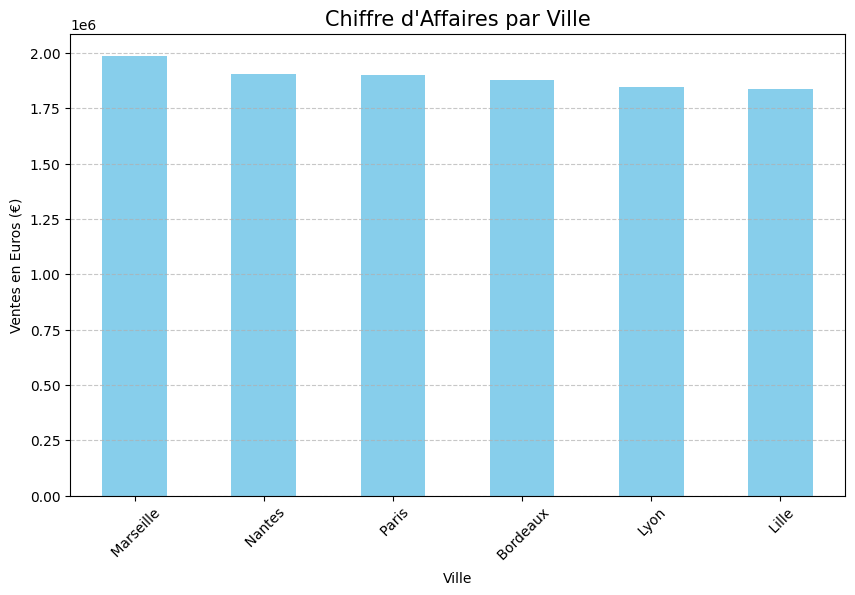

In [11]:
import matplotlib.pyplot as plt

# 1. Préparer les données (on reprend notre calcul précédent)
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

# 2. Créer le graphique
plt.figure(figsize=(10, 6)) # Définit la taille de l'image
city_sales.plot(kind='bar', color='skyblue')

# 3. Ajouter les titres et labels (La règle du métier : Toujours nommer ses axes !)
plt.title('Chiffre d\'Affaires par Ville', fontsize=15)
plt.xlabel('Ville')
plt.ylabel('Ventes en Euros (€)')
plt.xticks(rotation=45) # Incliner les noms des villes pour qu'ils soient lisibles
plt.grid(axis='y', linestyle='--', alpha=0.7) # Ajouter une petite grille de fond

# 4. Afficher
plt.show()

Même technique effectuer que notre question précédentes, cette fois ci l'attribut clé n'est pas "le mois", mais plutôt "la ville" est on remarque très clairement que Marseille et la ville qui nous rapporte le plus avec un CA de 1987480.18 €

#Quels sont les horaires les plus propices à notre marché ?

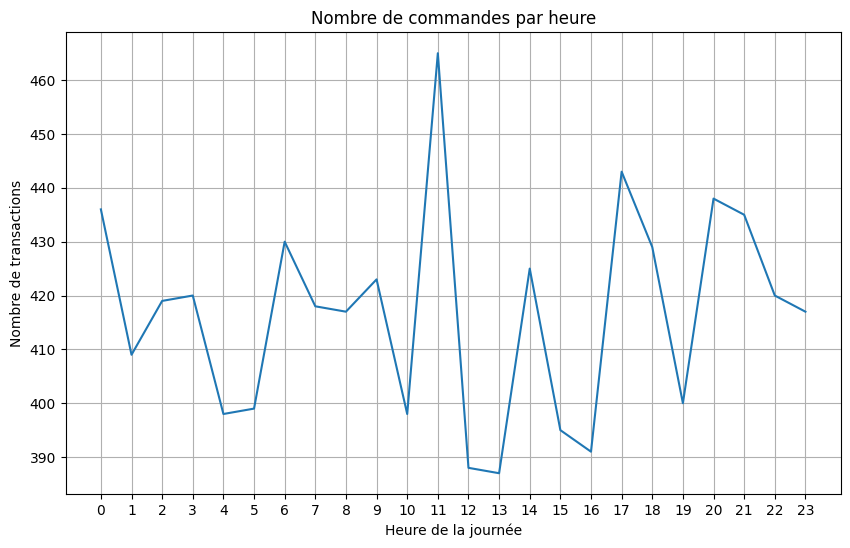

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

#Convertir la colonne date en format "Datetime" (pour que Python comprenne les heures)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')

# 2. Extraire l'heure dans une nouvelle colonne
df['Hour'] = df['Order Date'].dt.hour

# 3. Compter le nombre de commandes par heure
virees_horaires = df.groupby('Hour').count()['Order ID']

# 4. Visualiser pour trouver l'horaire idéale
plt.figure(figsize=(10,6))
virees_horaires.plot(grid=True)
plt.xticks(range(0,24))
plt.title('Nombre de commandes par heure')
plt.xlabel('Heure de la journée')
plt.ylabel('Nombre de transactions')
plt.show()

On constate que de nombreuses transactions s'effectue entre 10h et 12h, avec plus de 460 transactions confirmées.

Conclusion :

En analysant les 10 000 transactions, on réalise que tout se joue en milieu de matinée, avec un trafis plutôt dense entre 10h et 12h.

Pour l'entreprise, c'est un gain énorme au lieu de diffuser des publicités au hasard toute la journée, il est bien plus efficace de concentrer ses efforts et son budget juste avant ces heures de pointe. Que ce soit pour l'envoi d'un email ou le lancement d'une promo, viser ce créneau permet de toucher le client au moment exact où il est prêt à acheter.